In [36]:
import pandas as pd
import numpy as np
import re
!pip install us

import us
import matplotlib.pyplot as plt
import seaborn as sns

# Data

Source: Burea of Labor Statistics Occupational Employment Statistics  
https://data.bls.gov/oes/

In [37]:
# Read in data and rename columns
data_scientist = pd.read_excel('/content/wages_data_scientist.xlsx', engine='openpyxl', skiprows=5)[0:51]
data_scientist.columns = ['state', 'data_scientist']

database_admin = pd.read_excel('/content/wages_database_admin.xlsx', engine='openpyxl', skiprows=5)[0:51]
database_admin.columns = ['state', 'database_admin']

developer = pd.read_excel('/content/wages_developer.xlsx', engine='openpyxl', skiprows=5)[0:52]
developer.columns = ['state', 'developer']

statistician = pd.read_excel('/content/wages_statistician.xlsx', engine='openpyxl', skiprows=5)[0:47]
statistician.columns = ['state', 'statistician']

# Merge data
df = (pd
    .merge(data_scientist, database_admin, on='state', how='outer')
    .merge(developer, on='state', how='outer')
    .merge(statistician, on='state', how='outer')
)


# Dictionary of state abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Remove codes from states
df.state = df.state.apply(lambda x: re.sub(r'\(.*\)', '', x).strip())

# Convert state names to abbreviations using the dictionary
df.state = df.state.apply(lambda x: state_abbreviations.get(x, x))
# df.state = df.state.apply(lambda x: us.states.lookup(x).abbr if x != 'District of Columbia' else 'DC')
df.state = df.state.apply(lambda x: state_abbreviations[x] if x in state_abbreviations else x)

# Convert columns to numeric, in thousands unit
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col] / 1000

# Add average wage column
df['avg'] = df.apply(lambda x: x[1:].mean(), axis=1)

# Print
df.head(10)

,state,data_scientist,database_admin,developer,statistician,avg
0,AL,91.57,87.09,107.87,75.23,90.4400
1,AK,103.81,92.04,137.94,103.36,109.2875
2,AZ,104.22,99.37,121.93,85.06,102.6450
3,AR,NaN,77.56,87.38,NaN,82.4700
4,CA,147.39,114.24,182.57,136.21,145.1025
5,CO,116.56,111.21,136.23,92.24,114.0600
6,CT,110.22,114.91,120.18,128.63,118.4850
7,DE,133.32,104.62,121.41,111.65,117.7500
8,DC,110.19,111.53,136.97,114.10,118.1975
9,FL,100.78,100.26,113.30,83.82,99.5400


# Visualizations

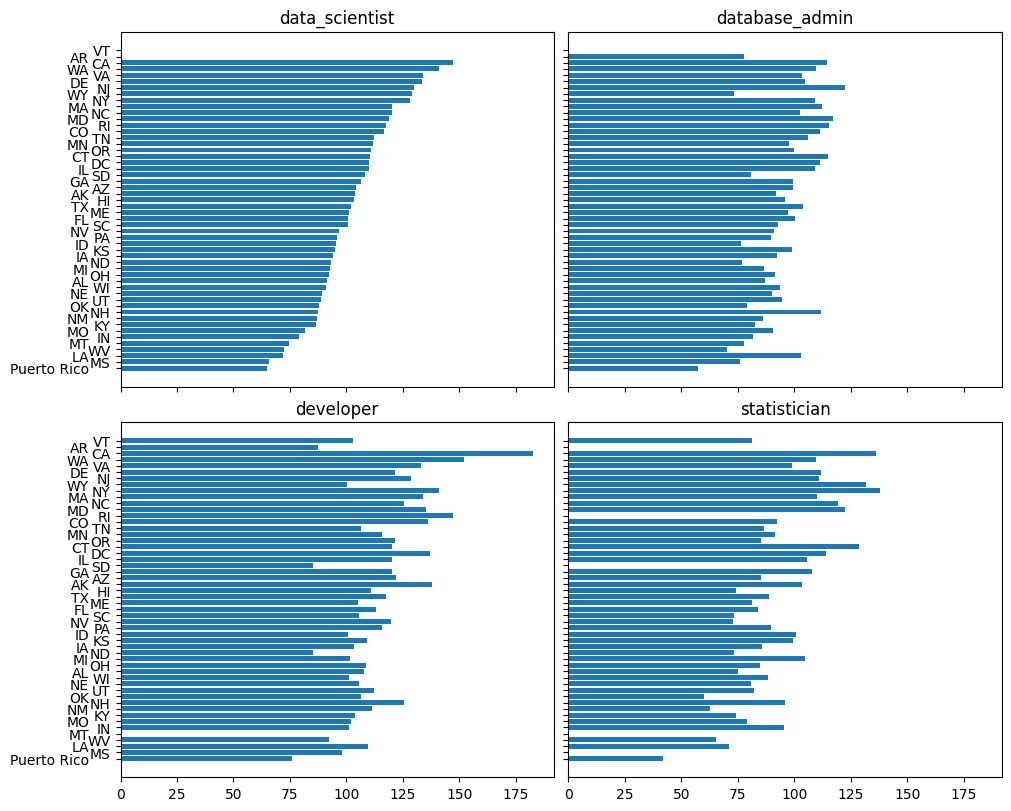

In [38]:
df.sort_values(by='data_scientist', ascending=True, inplace=True)

fig, axes = plt.subplots(2, 2, layout='constrained', sharex=True, sharey=True, figsize=(10, 8))

for ax, col in zip(axes.ravel(), df.columns[1:]):
    ax.barh(df.state, df[col])
    ax.set_title(col)

    for i, label in enumerate(ax.get_yticklabels()):
        if i % 2 == 0:
            label.set_position((-0.05, 0))

plt.show()

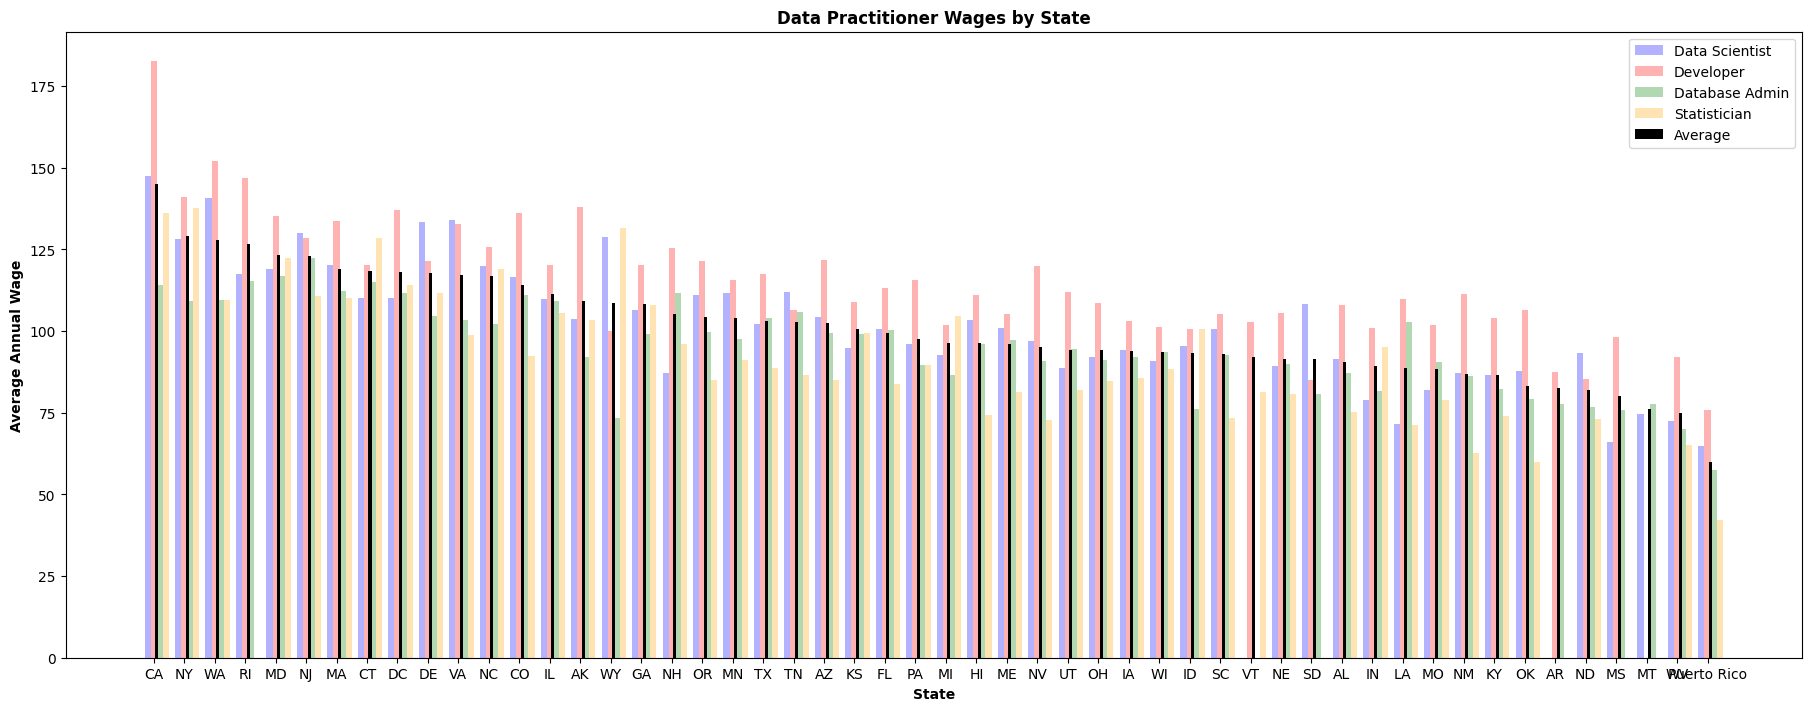

In [39]:
df.sort_values(by='avg', ascending=False, inplace=True)

# Setting the positions and width for the bars
positions = np.arange(len(df.state))  # Position of bars on x-axis
barWidth = 0.2
group_spacing = 0.2
positions = np.arange(len(df.state)) * (4 * barWidth + group_spacing)
alpha = 0.3

# Set up fig
plt.figure(figsize=(18, 7), layout='constrained')

# Plotting both groups
plt.bar(positions - barWidth, df.data_scientist, color='blue', width=barWidth, alpha=alpha, label='Data Scientist')
plt.bar(positions, df.developer, color='red', width=barWidth, alpha=alpha, label='Developer')
plt.bar(positions + barWidth, df.database_admin, color='green', width=barWidth, alpha=alpha, label='Database Admin')
plt.bar(positions + barWidth*2, df.statistician, color='orange', width=barWidth, alpha=alpha, label='Statistician')
plt.bar(positions + barWidth/2, df.avg, color='black', width=barWidth-0.1, label='Average')

# Adding labels
plt.xlabel('State', fontweight='bold')
plt.xticks(positions, df.state)
plt.ylabel('Average Annual Wage', fontweight='bold')
plt.title('Data Practitioner Wages by State', fontweight='bold')

# Creating legend
plt.legend(loc='upper right')

# Showing the plot
plt.show()

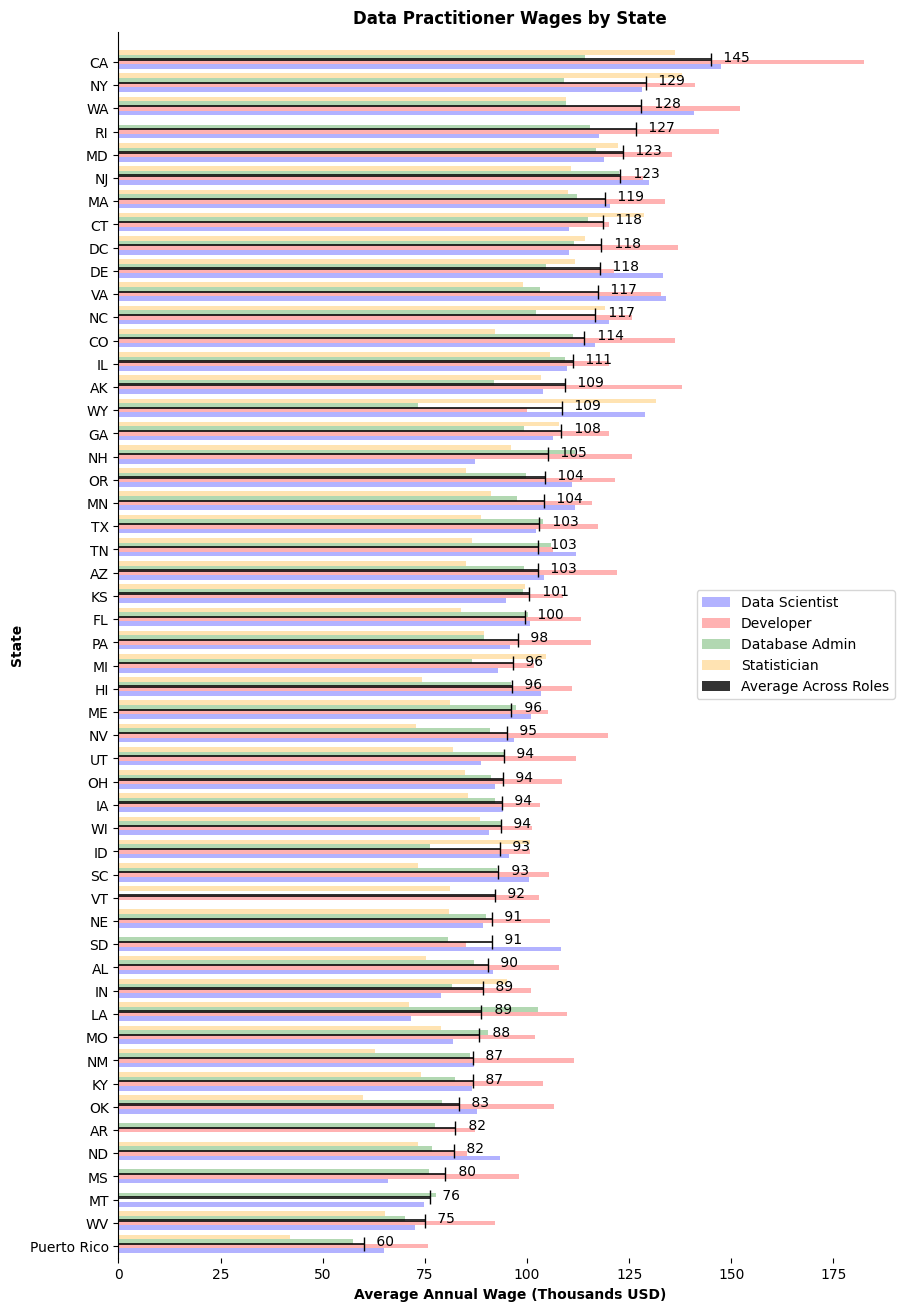

In [40]:
df.sort_values(by='avg', ascending=True, inplace=True)

# Setting the positions and width for the bars
positions = np.arange(len(df.state))  # Position of bars on y-axis
barWidth = 0.2
group_spacing = 0.2
positions = np.arange(len(df.state)) * (4 * barWidth + group_spacing)
alpha = 0.3
padding = 0.5

# Set up fig
plt.figure(figsize=(9, 13), layout='constrained')  # Adjusted for better fit of horizontal bars

# Plotting both groups - Note the swapping of positions and bar lengths
plt.barh(positions - barWidth, df.data_scientist, height=barWidth, alpha=alpha, color='blue', label='Data Scientist')
plt.barh(positions, df.developer, height=barWidth, alpha=alpha, color='red', label='Developer')
plt.barh(positions + barWidth, df.database_admin, height=barWidth, alpha=alpha, color='green', label='Database Admin')
plt.barh(positions + barWidth*2, df.statistician, height=barWidth, alpha=alpha, color='orange', label='Statistician')
# Add Average with different styles
plt.barh(positions + barWidth/2, df.avg, height=barWidth-0.1, color='black', label='Average Across Roles', alpha=0.8)

# Iterate over the bars to add a "T" effect and annotate
for i, value in enumerate(df.avg):
    # Extract positions
    x_position = value
    y_start = positions[i] + barWidth/2 - (barWidth*1.5)
    y_end = positions[i] + barWidth/2 + (barWidth*1.5)

    # Draw the vertical line for the "T" effect
    plt.vlines(x_position, y_start, y_end, color='black', linewidth=1)

    # Annotate the line with the value of 'avg'
    plt.text(x_position + 2, positions[i] - barWidth/2, f' {value:.0f}', va='bottom', color='black')

# Adding labels
plt.ylabel('State', fontweight='bold')
plt.yticks(positions, df.state)
plt.xlabel('Average Annual Wage (Thousands USD)', fontweight='bold')
plt.title('Data Practitioner Wages by State', fontweight='bold')

# Creating legend
plt.legend(loc='center right')

# Remove spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust whitespace
plt.ylim([min(positions) - padding, max(positions) + barWidth * 4 + padding])

# Showing the plot
plt.show()